<a href="https://colab.research.google.com/github/EduardoMoraesRitter/introducao_Deep_Learning_keras_tensorflow/blob/master/deep_learning_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

introdutório de  Deep Learning é uma subcategoria do Machine Learning:

*   Deep Learning se baseia em duas coisas: vetores e tensores

*   biblioteca do Google especializada em Redes Neurais Profundas chamada TensorFlow, usando API alto nível que está acima do TensorFlow o Keras foi construído em cima de uma outra biblioteca chamada Theano.

*   dataset chamado Fashion-MNIST organizado com imagens de várias roupas diferentes. https://github.com/zalandoresearch/fashion-mnist

*   visualizar a imagem usando matplotlib.pyplot

*   nosso modelo tem 3 camadas

    1.   camada 0 que está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels. array de 2 dimensões e achatando-o para que fique com uma dimensão única usando Flatten

    2.   camada 1, A camada dense (densa) é aquela que faz as conexões entre todas as unidades da camada 2 com as unidades da camada 1. TensorFlow  múltiplo de 2






A função não linear introduz no modelo a transformação dos dados necessária para identificarmos as diferenças nas imagens que vamos classificar. Nesse caso, escolhemos a função ReLU.


In [0]:
#keras esta dentro do tensorflow
import tensorflow
from tensorflow import keras

In [0]:
#pegar o dataset
dataset = keras.datasets.fashion_mnist

In [3]:
#carregar dados
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()
imagens_treino

4423680/4422102 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
#imagens de treino
len(imagens_treino)

60000

In [5]:
#uma imagem de 28 por 28 as dimencoes
imagens_treino.shape

(60000, 28, 28)

In [0]:
#visualizar a imagem
import matplotlib.pyplot as plt

Text(0.5, 1.0, '9')

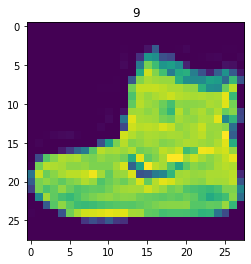

In [7]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [8]:
identificacoes_treino

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

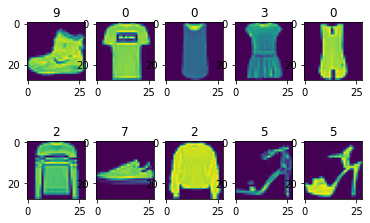

In [9]:
#loop para mostrar algumas fotos
for i in range(10):
  #quando colocamos mais de um grafico precisamos colocar um subgrafico, passando 2 linhas e 5 colunas
  plt.subplot(2,5,i+1)
  plt.imshow(imagens_treino[i])
  plt.title(identificacoes_treino[i])

In [10]:
nome_classificacoes = ['camiseta','calsa','pullover','cestido','casaco',
                       'sandalia','camisa','tenis','bolsa','bota']
nome_classificacoes

['camiseta',
 'calsa',
 'pullover',
 'cestido',
 'casaco',
 'sandalia',
 'camisa',
 'tenis',
 'bolsa',
 'bota']

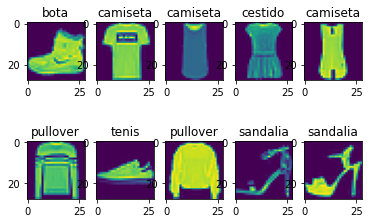

In [11]:
#loop para mostrar algumas fotos
for i in range(10):
  #quando colocamos mais de um grafico precisamos colocar um subgrafico, passando 2 linhas e 5 colunas
  plt.subplot(2,5,i+1)
  plt.imshow(imagens_treino[i])
  plt.title(nome_classificacoes[identificacoes_treino[i]])

#Criando o modelo
---
camadas(layers) da rede neural

modelo > entrada > processamento > saida

temos  >    56    >       256     >   10  






In [12]:
#camada 0(Flatten) um achatamento transformando imagens de 28x28 pixel em 56 dimencoes
#camada 1(Dense) camada profunca, sempre multiplo de 2 para numero de NOS e activation ReLU - funcao nao linear transforma negativo em 0 
#camada 2(softmax), Softmax e multicamadas, descreve a 
modelo1 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

#compliar o modelo, passando o otimizado(adam para valizar classes) e percar de informação(Entropia Cruzada Categórica Esparsa)
modelo1.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo1.fit(imagens_treino, identificacoes_treino)
#saida vemos:
#epoch(épocas um ciculo) é quantas vezes passamos por cada uma das imagen;
#quantidade de imagens
#loss(perca) de 3,5% temos que ter o minimo possivel

1875/1875 [==============================] - 4s 2ms/step - loss: 3.5978


graduacao de cores sao as dimencoes 0 a 255. 

#normalizacao

transformar as imagens de 0 a 255 para 0 e 1

diminuir as variacoes de cores converter para 0 e 1 e esses valores do meio podem ser 0.1, 0.4, 0.6 ...

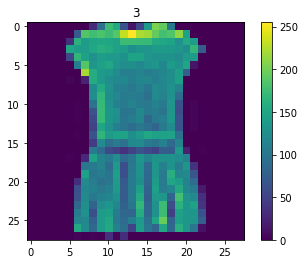

In [13]:
plt.imshow(imagens_treino[3])
plt.title(identificacoes_treino[3])
plt.colorbar()

In [14]:
#normalizar os dados, esse print é da primeira linha so
print("original: ", imagens_treino[3][0])
imagens_treino_normalizado = imagens_treino/float(255)
print("\n\n normalizado: ", imagens_treino_normalizado[3][0])

original:  [  0   0   0   0   0   0   0   0  33  96 175 156  64  14  54 137 204 194
 102   0   0   0   0   0   0   0   0   0]


 normalizado:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.12941176 0.37647059 0.68627451 0.61176471
 0.25098039 0.05490196 0.21176471 0.5372549  0.8        0.76078431
 0.4        0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


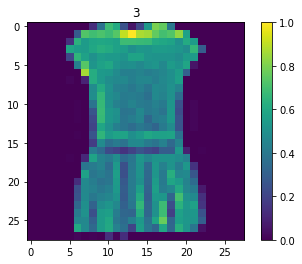

In [15]:
#a escala nao muda oq muda é o valor e nao tem perda na imagem
plt.imshow(imagens_treino_normalizado[3])
plt.title(identificacoes_treino[3])
plt.colorbar()

In [16]:
#usando imagens normalizadas
#agora com 3 camadas 56 > 256 > 128 > 10
modelo2 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo2.fit(imagens_treino_normalizado, identificacoes_treino)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4852


dimunuir a rede com outra camada, camada oculta

In [17]:
#agora com 4 camadas 56 > 256 > 128 > 10
modelo3 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(128, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo3.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo3.fit(imagens_treino_normalizado, identificacoes_treino)
#demoro mais por conta da nova camada
#teve uma perca a mais

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4759


In [18]:
#agora com 5 camadas 56 > 256 > 128 > 64 > 10
modelo4 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(128, activation=tensorflow.nn.relu),
                           keras.layers.Dense(64, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo4.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo4.fit(imagens_treino_normalizado, identificacoes_treino)
#demoro mais por conta da nova camada
#teve uma perca a mais

1875/1875 [==============================] - 5s 3ms/step - loss: 0.4869


In [19]:
#agora com 4 camadas 56 > 64 > 10
modelo5 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(64, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo5.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy')

modelo5.fit(imagens_treino_normalizado, identificacoes_treino)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.5175


mudar as epocas e medir a acuracia

In [20]:
#4 camadas 56 > 256 > 10
#agora almentar as epocas epochs=5
#saber as metricas de accuracy
modelo6 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo6.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

modelo6.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4848 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3637 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3266 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3017 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2873 - accuracy: 0.8935


predicao e testes

In [21]:
testes = modelo6.predict(imagens_teste)
#retona 10 posicoes
testes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
import numpy as np

In [23]:
print("teste: ", np.argmax(testes[0]))
print("real: ", identificacoes_teste[0])

teste:  9
real:  9


In [24]:
#funcao de avaliacao
perda_teste, acuracia_teste = modelo6.evaluate(imagens_teste, identificacoes_teste)
print('acuracia: ', acuracia_teste)
print('perda: ', perda_teste)

313/313 [==============================] - 0s 1ms/step - loss: 52.3196 - accuracy: 0.8633
acuracia:  0.8633000254631042
perda:  52.31959533691406


In [25]:
#converter as imagens tbm?
imagens_teste_normalizado = imagens_teste/float(255)

#funcao de avaliacao
perda_teste, acuracia_teste = modelo6.evaluate(imagens_teste_normalizado, identificacoes_teste)
print('acuracia: ', acuracia_teste)
print('perda: ', perda_teste)

313/313 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8800
acuracia:  0.8799999952316284
perda:  0.3362891674041748


#separar dados para validacao e visulizar

In [26]:
#4 camadas 56 > 256 > 10
#agora almentar as epocas epochs=5
#saber as metricas de accuracy
#tbm incluir dados para a validacao de 20%
modelo7 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo7.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico7 = modelo7.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5027 - accuracy: 0.8230 - val_loss: 0.3938 - val_accuracy: 0.8597
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3768 - accuracy: 0.8635 - val_loss: 0.3775 - val_accuracy: 0.8652
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3359 - accuracy: 0.8784 - val_loss: 0.3747 - val_accuracy: 0.8680
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3116 - accuracy: 0.8852 - val_loss: 0.3555 - val_accuracy: 0.8759
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2928 - accuracy: 0.8915 - val_loss: 0.3306 - val_accuracy: 0.8810


In [27]:
historico7

In [28]:
historico7.history

{'accuracy': [0.8230000138282776,
  0.8634583353996277,
  0.8783958554267883,
  0.8852291703224182,
  0.8915416598320007],
 'loss': [0.5026541948318481,
  0.37678223848342896,
  0.3358750343322754,
  0.311593234539032,
  0.2927745282649994],
 'val_accuracy': [0.859749972820282,
  0.8651666641235352,
  0.8679999709129333,
  0.8759166598320007,
  0.8809999823570251],
 'val_loss': [0.3937758505344391,
  0.3775140643119812,
  0.3747345507144928,
  0.35554182529449463,
  0.3305797874927521]}

In [29]:
historico7.history['accuracy']

[0.8230000138282776,
 0.8634583353996277,
 0.8783958554267883,
 0.8852291703224182,
 0.8915416598320007]

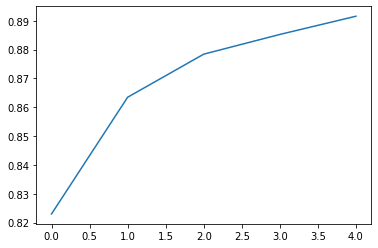

In [30]:
plt.plot(historico7.history['accuracy'])

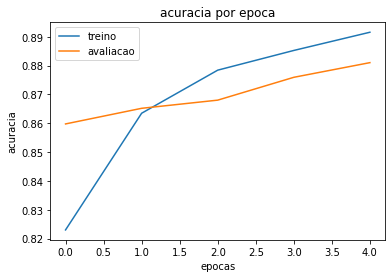

In [31]:
#visualizar a acuracia conforme o treino
plt.plot(historico7.history['accuracy'])
plt.plot(historico7.history['val_accuracy'])
plt.title('acuracia por epoca')
plt.xlabel('epocas')
plt.ylabel('acuracia')
plt.legend(['treino', 'avaliacao'])

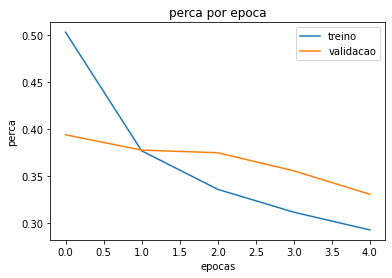

In [32]:
#visualizar a perca conforme o treino
plt.plot(historico7.history['loss'])
plt.plot(historico7.history['val_loss'])
plt.title('perca por epoca')
plt.xlabel('epocas')
plt.ylabel('perca')
plt.legend(['treino', 'validacao'])

**underfitting** - nao esta se adequando bem, fazer ajustes no treinamento, na percaquando a validacao esta alta e treino esta baixo

In [40]:
#4 camadas 56 > 256 > 10
#agora almentar as epocas epochs=10
#saber as metricas de accuracy
#tbm incluir dados para a validacao de 20%
modelo8 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo8.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico8 = modelo8.fit(imagens_treino_normalizado, identificacoes_treino, epochs=8, validation_split=0.2)

Epoch 1/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5061 - accuracy: 0.8230 - val_loss: 0.4353 - val_accuracy: 0.8437
Epoch 2/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3764 - accuracy: 0.8637 - val_loss: 0.3811 - val_accuracy: 0.8601
Epoch 3/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3385 - accuracy: 0.8752 - val_loss: 0.3682 - val_accuracy: 0.8685
Epoch 4/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8870 - val_loss: 0.3351 - val_accuracy: 0.8769
Epoch 5/8
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.8928 - val_loss: 0.3335 - val_accuracy: 0.8812
Epoch 6/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2762 - accuracy: 0.8971 - val_loss: 0.3190 - val_accuracy: 0.8872
Epoch 7/8
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2633 - accuracy: 0.9022 - val_loss: 0.3251 - val_accuracy: 0.8803

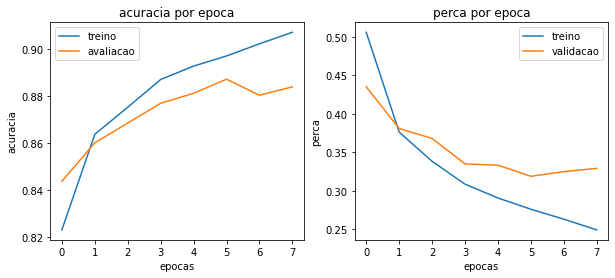

In [41]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

#visualizar a acuracia conforme o treino
axs[0].plot(historico8.history['accuracy'])
axs[0].plot(historico8.history['val_accuracy'])
axs[0].set_title('acuracia por epoca')
axs[0].set_xlabel('epocas')
axs[0].set_ylabel('acuracia')
axs[0].legend(['treino', 'avaliacao'])

#visualizar a perca conforme o treino
axs[1].plot(historico8.history['loss'])
axs[1].plot(historico8.history['val_loss'])
axs[1].set_title('perca por epoca')
axs[1].set_xlabel('epocas')
axs[1].set_ylabel('perca')
axs[1].legend(['treino', 'validacao'])

**ouverfitting** - siginifica o oposto do undefit, tambem quando o dados de treino e validacao estao oposto. 
intrepretar o grafico:
 
*   na acuracia - se a linha de treino esta ok e a linha de validacao esta baixando, a rede entende melhor o treino do a validacao, isso é ruim
*   na perda - se se o treino esta muito diferente de validacao, isso é ruim



Caso o nosso modelo não estivesse entendendo os dados de treino, e a nossa curva de erro de treino estivesse subindo ao invés de descendo, aí sim teríamos um modelo se adequando pouco aos nossos dados, underfitting.


Repare na curva de validação na qual o erro aumenta cada vez mais e na curva de treino que ele apenas reduz. Isso indica que nosso modelo está perdendo pouquíssima informação no treino e muita na validação. O que mostra que ele está servindo bem demais o modelo, overfitting.
 

#solução para overfit é normalizar com dropout
uma camada para deixar neuronios ardomecido(Dropout) assim tiramos o overfit esse é um tipo de normalizacao

In [44]:
#5 camadas 56 > 256 > -20% > 10
modelo9 = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

modelo9.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico9 = modelo9.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5285 - accuracy: 0.8138 - val_loss: 0.3890 - val_accuracy: 0.8612
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3985 - accuracy: 0.8540 - val_loss: 0.3613 - val_accuracy: 0.8676
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3639 - accuracy: 0.8660 - val_loss: 0.3648 - val_accuracy: 0.8655
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3431 - accuracy: 0.8743 - val_loss: 0.3434 - val_accuracy: 0.8754
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3220 - accuracy: 0.8803 - val_loss: 0.3433 - val_accuracy: 0.8733


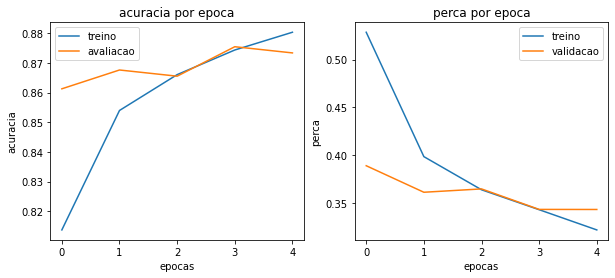

In [45]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

#visualizar a acuracia conforme o treino
axs[0].plot(historico9.history['accuracy'])
axs[0].plot(historico9.history['val_accuracy'])
axs[0].set_title('acuracia por epoca')
axs[0].set_xlabel('epocas')
axs[0].set_ylabel('acuracia')
axs[0].legend(['treino', 'avaliacao'])

#visualizar a perca conforme o treino
axs[1].plot(historico9.history['loss'])
axs[1].plot(historico9.history['val_loss'])
axs[1].set_title('perca por epoca')
axs[1].set_xlabel('epocas')
axs[1].set_ylabel('perca')
axs[1].legend(['treino', 'validacao'])

#salvar o modelo e carregar modelo


O que salvas fica dentro do drive, porém somente acessível via API, tem bastante exemplo na net mas esse artigo pode te dar um norte: https://medium.com/@ml_kid/how-to-save-our-model-to-google-drive-and-reuse-it-2c1028058cb2

In [0]:
#salvar o modelo com a instencao .h5 quando tem muito dados
modelo9.save('modelo.h5')

In [0]:
#carregar o modelo
from tensorflow.keras.models import load_model

#modelo_carregado = load_model('modelo.h5')
#WARNING:tensorflow:Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.

modelo_carregado = load_model('modelo.h5', compile=False)

In [62]:
testes = modelo_carregado.predict(imagens_teste)
#retona 10 posicoes
testes[0]

print("teste: ", np.argmax(testes[0]))
print("real: ", identificacoes_teste[0])

teste:  9
real:  9


#Para saber mais


Para fazer essas transformações, precisamos explorar os dados como fazemos no curso com o pyplot do matplotlib, e usar também uma biblioteca como a scipy do Python que tem um módulo chamado ndimage apenas para lidar com imagens.

from scipy import ndimage

http://scipy-lectures.org/advanced/image_processing/